# Aproximación de enlace fuerte

Siempre pretendemos resolver

$$ \hat{H} | \psi \rangle = E | \psi \rangle $$

La función de onda la escribimos como una combinación de orbitales atómicos para el carbono, $s_p^3$, $s$. $p_x$, $p_y$, $p_z$.

$$ \psi = \sum_{i=1}^{n} c_i \phi (\vec{r} - R_i) $$

donde n es el número de átomos que tengo,

$$ \sum_{i}^{n} c_i \hat{H} \phi ( \vec{r} - \vec{R}_i) = E \sum_{i=1}^{n} c_i \phi_i (\vec{r} - \vec{R}_i) $$

Multiplicamos a izquierda por $\phi^{*} (\vec{r} - \vec{R}_j)$ e integramos en todo el espacio:

$$ \sum_{i=1}^{n} c_i \int \phi^{*}_j(\vec{r}-\vec{R}_j)  \hat{H} \phi(\vec{r}-\vec{R}_i) d\vec{r} = E \sum_{i=1}^{n} c_i \int \phi^{*} (\vec{r}-\vec{R}_j) \phi(\vec{r}-\vec{R}_i) d\vec{r}$$

Los orbitales atómicos son ortonormales entre sí

$$ \int \phi^{*} (\vec{r} - \vec{R}_j) \phi((\vec{r} - \vec{R}_j) d\vec{r} = \delta_{ij}$$

$$ \sum_{i=1} c_i \int \phi^{*} (\vec{r} - \vec{R}_j) \hat{H} \phi(\vec{r} - \vec{R}_i) d\vec{r} = E c_j $$

Aoproximación:

1 a primeros vecinos:

$$ C_1 t + C_5 t = E C_0 $$
$$ C_0 t + C_2 t = E C_1 $$
$$ C_1 t + C_3 t = E C_2 $$
$$ C_2 t + C_4 t = E C_3 $$
$$ C_3 t + C_5 t = E C_4 $$
$$ C_0 t + C_4 t = E C_5 $$

$$ \left( \begin{matrix}
0 && t && 0 && 0 && 0 && t \\
t && 0 && t && 0 && 0 && 0 \\
0 && t && 0 && t && 0 && 0 \\
0 && 0 && t && 0 && t && 0 \\
0 && 0 && 0 && t && 0 && t \\
t && 0 && 0 && 0 && t && 0 \\
\end{matrix}  \right) \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) = E \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) $$


Los valores de t, los podemos determinar desde experimentos desde otros cálculos. Dado el valor de t determinar E.

t = -2.7

In [1]:
# Importando paquetes
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Funcion que lee un archivo y genera un vector de atomos
# y coordenadas.
def readfile(archivo):
    file = open(archivo, "r")
    lines = file.readlines()
    atom=[]
    coords=[]
    for line in lines[2:]:
        A, x, y, z = line.split()
        coords.append([x,y])
        if A == 'C': A = 1
        else: A = 0
        atom.append(A)
    coords = np.array(coords, dtype=float)
    file.close()
    return atom,coords

# Funcion que genera una matriz de distancias entre los Carbonos.
def getMatrizDistancias(atom,coords):
    C = pd.DataFrame(coords, columns=['x', 'y'], index=atom)
    Cs = C[C.index==1] 
    X1, X2 = np.meshgrid(Cs.x,Cs.x)
    Y1, Y2 = np.meshgrid(Cs.y,Cs.y)
    #Z1, Z2 = np.meshgrid(Cs.z,Cs.z)
    D = np.sqrt((X2-X1)**2+(Y2-Y1)**2)#+(Z2-Z1)**2)
    return D

# Funcion que genera la matriz T.
def getT(t, atom, coords):
    D = getMatrizDistancias(atom, coords)
    np.fill_diagonal(D, 1000)
    D = pd.DataFrame(D) 
    Dmin = np.min(D)
    D[abs(D-1.44)>0.5]=0.
    D[D>0.]=t
    return np.array(D)

# Funcion que genera un punto cuantico triangular 
# de tamaño n.
def TriangularGraphene(n):
    n=n+1
    acc=1.44
    coords=[]
    for j in range(n):
        for i in range(-j,j+2,2):
            coords.append((i*sqrt(3)/2*acc, 1.5*j*acc))
            coords.append((i*sqrt(3)/2*acc, 1.5*j*acc+acc))
            if j==(n-1) and i!=(n-1):
                coords.append(((i+1)*sqrt(3)/2*acc,
                               (1.5*j+1.5)*acc))
    coords.pop(0)
    return np.array(coords)

# Grafica de puntos cuanticos triangulares y energías.
def graficando(n,E,x,y,eigvec=0, s=False):
    fig,(ax1,ax2) = plt.subplots(figsize=(8,2.5), dpi=100, ncols=2)
    ax1.set_title("n="+str(n), fontsize=10, color='r')
    ax2.set_title("n="+str(n), fontsize=10, color='r')
    ax1.plot(E, '.-')
    if s==False: ax2.plot(x,y, '.')
    else:
        C = ax2.scatter(x, y, s=eigvec*100, c=E, cmap='jet')
        cbar = fig.colorbar(C)
        cbar.set_label("Energías")
        [ax2.text(x[i], y[i], str(i), fontsize=7) for i in range(len(x))]
    plt.show()

In [2]:
# Lee archivo y calcula energías
atom, coords = readfile('benzene.xyz')
t = -2.8
T = getT(t, atom, coords)
E, eigvec = np.linalg.eigh(T)
np.sort(E)

array([-5.6, -2.8, -2.8,  2.8,  2.8,  5.6])

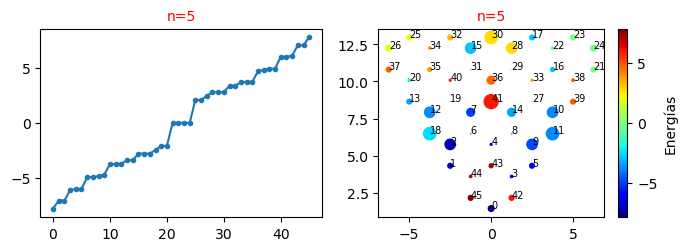

In [3]:
# Calcula energias de un punto cuantico triangular n.
# Genera coordenadas
n=5
coords = TriangularGraphene(n)
x, y = np.transpose(coords)
   
# Genera energias
t = -2.8
atom = np.ones(len(coords))
T = getT(t, atom, coords)
E, eigvec = np.linalg.eig(T)

# Ordena datos
datos = coords.copy()
datos = pd.DataFrame(np.transpose([x,y,E.real, tuple(eigvec.real)]),
                     columns=['x', 'y', 'E', 'eigvec'])
datos = datos.sort_values(by='E')
x, y = datos.x.values, datos.y.values
E = datos.E.values
eigvec= datos.eigvec.values

# Escribe archivo
N = 24
nn = len(coords) # n Carbonos
C = np.zeros(nn)
f = open("datos.xyz", "w")
for i in range(nn):
    C[i] = eigvec[i][N]**2*10
    f.write(str(x[i])+"\t"+str(y[i])+"\t"+str(C[i])+"\n")
f.close()

# Grafica datos
graficando(n,E,x,y,eigvec=C, s=True)

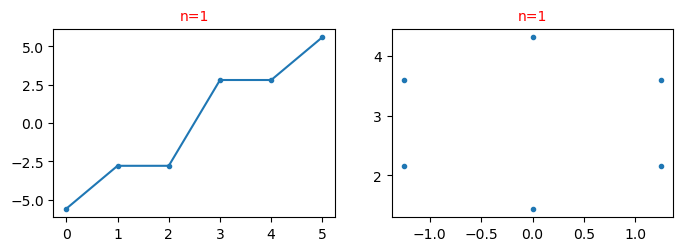

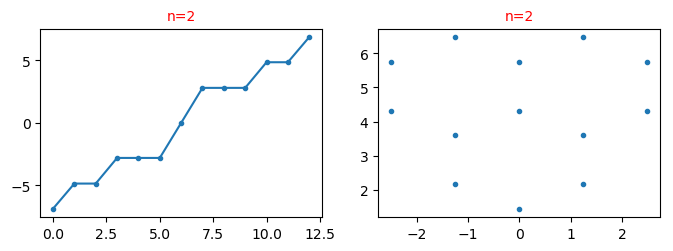

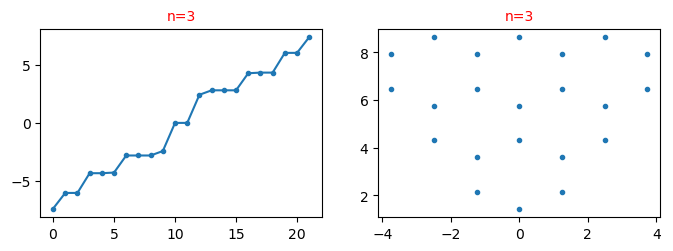

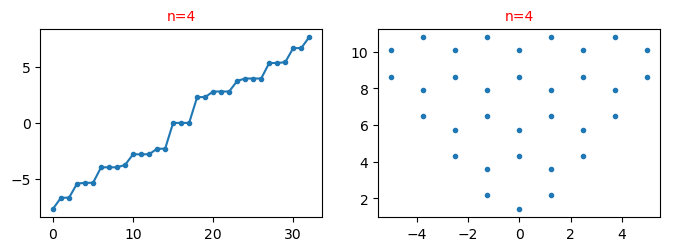

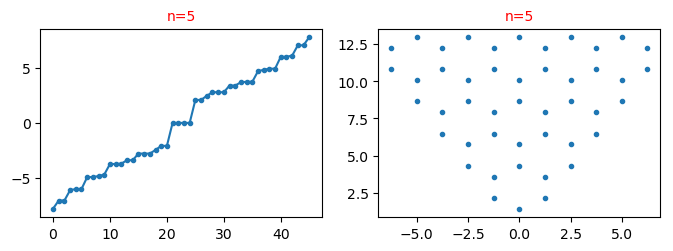

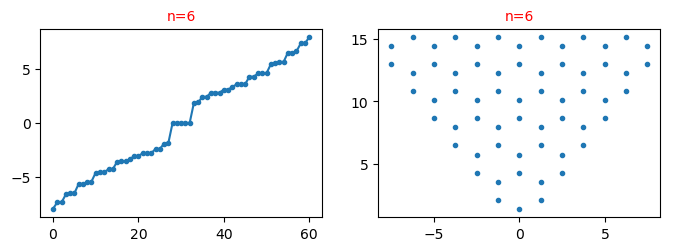

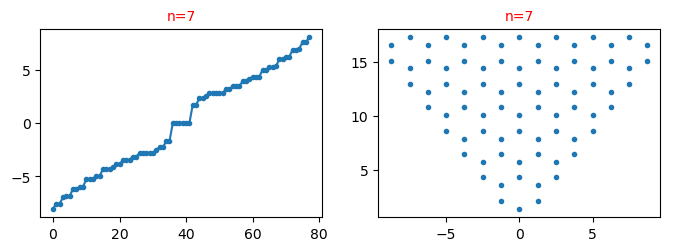

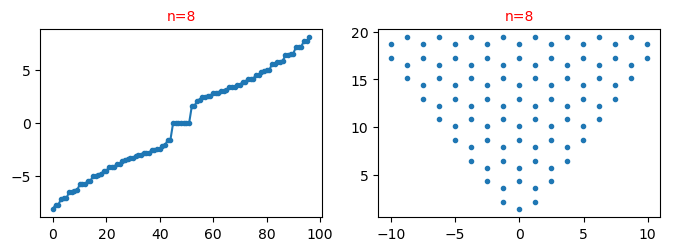

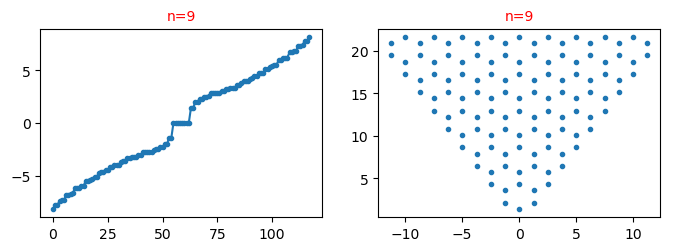

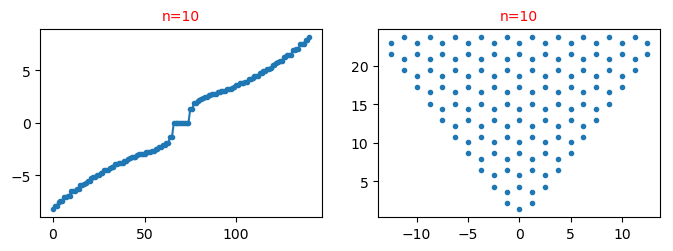

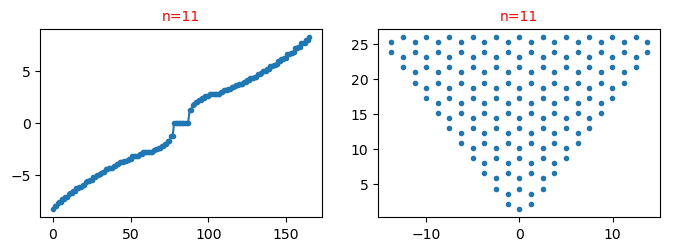

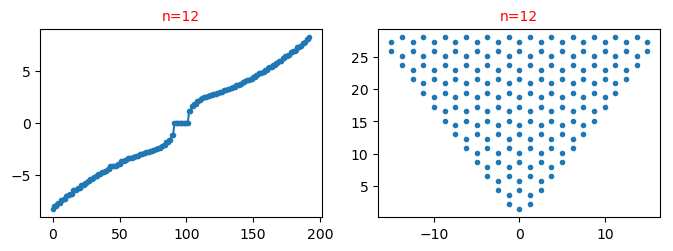

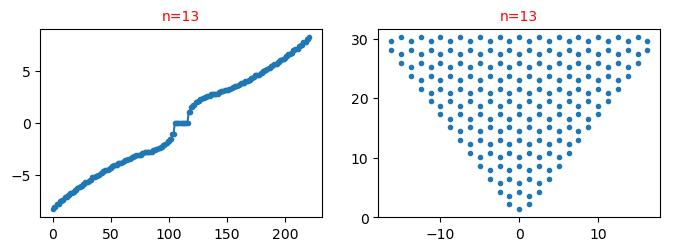

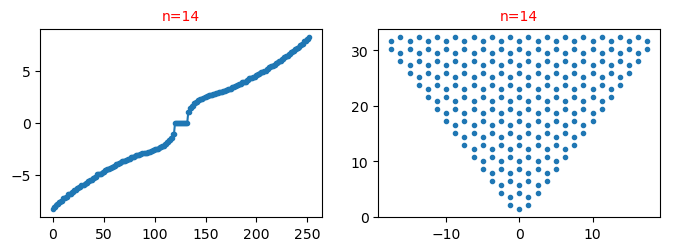

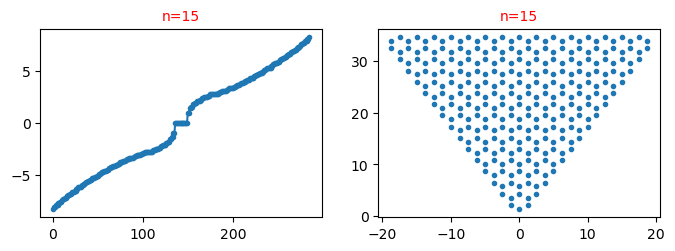

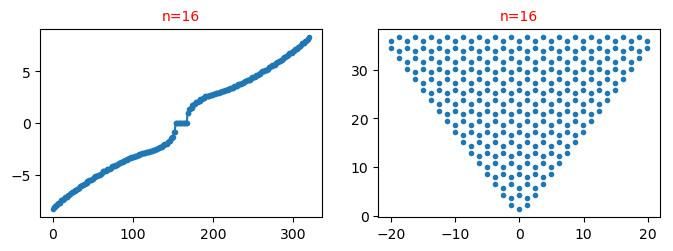

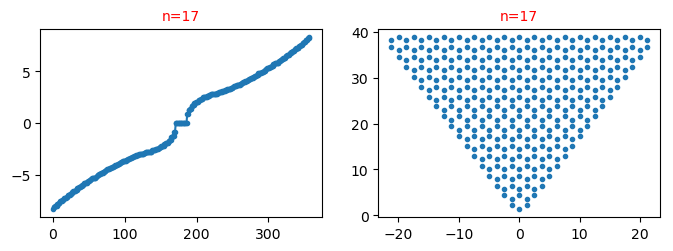

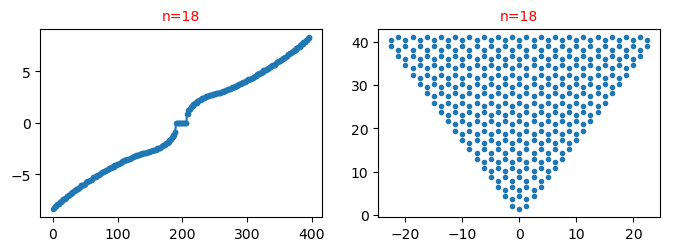

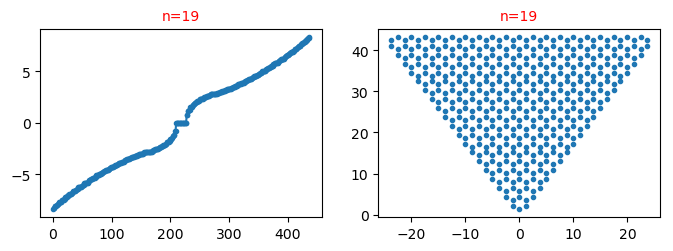

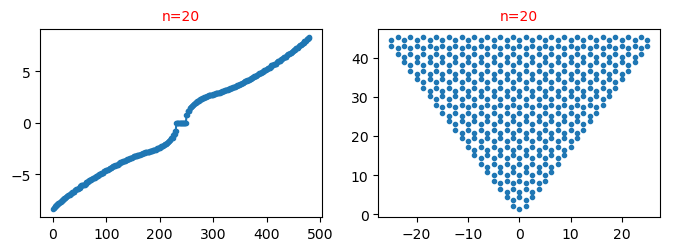

In [4]:
import matplotlib.pyplot as plt

t = -2.8
for i in range(1,21):
    coords = TriangularGraphene(i)
    x, y = np.transpose(coords)
    
    atom = np.ones(len(coords)) # 1 etiqueta de C.
    T = getT(t, atom, coords)
    E, eigvec = np.linalg.eigh(T)
    E= np.sort(E)
    
    graficando(i,E,x,y)

# Pybinding

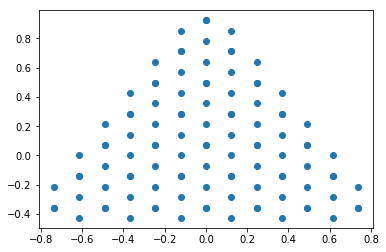

In [6]:
import numpy as np
import pybinding as pb
from pybinding.repository import graphene

model = pb.Model(graphene.bilayer(),
                 pb.regular_polygon(num_sides=3, radius=1.1))

x,y = model.system.x, model.system.y
plt.plot(x, y, 'o')